In [2]:
f= open('stop.txt', 'r') 
stop=f.read()
f.close()
print('Done1')
stop=set(stop.split('\n'))

Done1


In [0]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [0]:
#Preprocessing for train data
f= open('train.txt', 'r') 
contents=f.read()
f.close()
l=contents.split('\n')
a=[]
for i in l:
  a.append(i.split('\t'))
new=[]
l=[]
sen=[]
s=''
n=[]
p=0
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
#removing emojis
for i in range(len(a)):
  a[i][0]=deEmojify(a[i][0])

#removing @s  
for i in a:
  if('@' in i[0]):
    p=2
  else:  
    if(p==2):
      if(i[0]!='_'):
        p=1
      else:
        p=2
    elif(p==1):
      if(i[0]!='_'):
        p=0
        n.append(i)
      else:
        p=2        
    else:
      n.append(i)    
sent=[]

#remove punctuations
b=[]
for i in range(len(n)):
  s=''
  for j in n[i][0]:
    if(j not in punctuations):
      s=s+j 
  n[i][0]=s
  if(s!=''):
    b.append(n[i]) 
n=b[:]
b=[]
for i in range(len(n)):
  if(n[i][0]!='RT'):
    b.append(n[i])
n=b[:]    
#sentence formation
for i in n:
  if(i[0]=='meta'):
    new.append(l)
    l=[]
    sent.append(i[2])
  else:  
    l.append(i)
new.append(l)
new=new[1:]

new2=[]
#removing websites
for i in new:
  news=[]
  for j in i:
    if(j[0]=='https'):
      break
    else:
      news.append(j)
  new2.append(news) 
new3=[]
for i in new2:
  new=[]
  for j in i:
    if(j[0] not in stop):
      new.append(j)
      
  new3.append(new)
sen1=[]
for i in new3:
  s=''
  for j in i:
    s=s+j[0]+' '
  sen1.append(s.strip())
import pandas as pd
df=pd.DataFrame(list(map(list,zip(sen1,sent))),columns=['sen','emo'])
df=df.sample(frac=1)

In [0]:
#preprocessing for test data
f= open('test.txt', 'r') 
contents=f.read()
f.close()
l=contents.split('\n')
a=[]
for i in l:
  a.append(i.split('\t'))
new=[]
l=[]
sen=[]
s=''
n=[]
p=0
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
#removing emojis
for i in range(len(a)):
  a[i][0]=deEmojify(a[i][0])

#removing @s  
for i in a:
  if('@' in i[0]):
    p=2
  else:  
    if(p==2):
      if(i[0]!='_'):
        p=1
      else:
        p=2
    elif(p==1):
      if(i[0]!='_'):
        p=0
        n.append(i)
      else:
        p=2        
    else:
      n.append(i)    
sent=[]

#remove punctuations
b=[]
for i in range(len(n)):
  s=''
  for j in n[i][0]:
    if(j not in punctuations):
      s=s+j 
  n[i][0]=s
  if(s!=''):
    b.append(n[i]) 
n=b[:]
b=[]
for i in range(len(n)):
  if(n[i][0]!='RT'):
    b.append(n[i])
n=b[:]    
#sentence formation
for i in n:
  if(i[0]=='meta'):
    new.append(l)
    l=[]
    sent.append(i[2])
  else:  
    l.append(i)
new.append(l)
new=new[1:]

new2=[]
#removing websites
for i in new:
  news=[]
  for j in i:
    if(j[0]=='https'):
      break
    else:
      news.append(j)
  new2.append(news) 
new3=[]
for i in new2:
  new=[]
  for j in i:
    if(j[0] not in stop):
      new.append(j)
      
  new3.append(new)
sen1=[]
for i in new3:
  s=''
  for j in i:
    s=s+j[0]+' '
  sen1.append(s.strip())
import pandas as pd
df=pd.DataFrame(list(map(list,zip(sen1,sent))),columns=['sen','emo'])
df=df.sample(frac=1)

In [28]:
df

,sen,emo
11433,Paschim Bengal asansol v dholera smart city ba...,neutral
9316,Youre Smjhdaar xD haha alot,positive
3567,UPA dal dhiyan EVM sandeh savikar awor jeet EV...,neutral
13265,Tum logo bolne fark ni pdta usko Usk,neutral
12491,Jali Rana ayyub kehtey Aur bujhi Thanks suppor...,positive
...,...,...
9838,Tum kr Rahul Gandi chor jija Vadra gudgan rok,neutral
10345,Tickets kharid advance bsdko line lag Police d...,negative
2412,Yeah decision PAKISTAN zinadabad Pak army zind...,positive
7654,Race3 FDSS Mai 2 movie show Mai Tubelight Race...,positive


In [0]:
len(sent)

1869

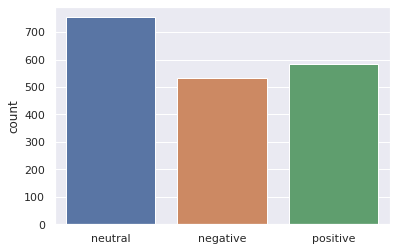

In [0]:
#A view of the dataset
import seaborn as sns
sns.set(style="darkgrid")
# titanic = sns.load_dataset("sent")
sns.countplot(x=sent)

In [0]:
#Finding maxlen of a sentence from both test data and train data
maxlen=0
for i in (list(df['sen'])+list(df1['sen'])):
  maxlen = max(maxlen,len(i))

In [0]:
#character level tokenisation
import re
def token(sentence, remove_vowels=False, remove_repeat=False, minchars=2):
    tokens = []
#   for t in re.findall("[A-Z]{2,}(?![a-z])|[A-Z][a-z]+(?=[A-Z])|[\w]+",sentence.lower()):
    for t in re.findall("[a-zA-Z]+",sentence.lower()):

        if len(t)>=minchars:
            if remove_vowels:
                t=removeVovels(t)
            if remove_repeat:
                t=removeRepeat(t)
            tokens.append(t)
    return tokens

VOWELS = ['a', 'e', 'i', 'o', 'u']

def removeRepeat(string):
    return re.sub(r'(.)\1+', r'\1\1', string)     

def removeVovels(string):
    return ''.join([l for l in string.lower() if l not in VOWELS])

def normalize_matrix(matrix):
    pass

In [0]:
#X_train and Y_train
import numpy as np
X_train = []
Y_train = []

#Processes individual lines
for line in list(df['sen']):
  # Seperator for the current dataset. Currently '\t'. 
  #Token is the function which implements basic preprocessing as mentioned in our paper
  tokenized_lines = token(line)
  
  #Creates character lists
  char_list = []
  for words in tokenized_lines:
    for char in words:
      char_list.append(char)
    char_list.append(' ')
  #print(char_list) - Debugs the character list created
  X_train.append(char_list)
  
  #Appends labels
for line in list(df['emo']):  
  if line == 'neutral':
    Y_train.append(0)
  if line == 'positive':
    Y_train.append(1)
  if line == 'negative':
    Y_train.append(2)

#Converts Y_train to a numpy array	
Y_train = np.asarray(Y_train)
assert(len(X_train) == Y_train.shape[0])



In [103]:
len(X_train)

15131

In [0]:
#X_test and Y_test
import numpy as np

X_test = []
Y_test= []

#Processes individual lines
for line in list(df1['sen']):
  # Seperator for the current dataset. Currently '\t'. 
  #Token is the function which implements basic preprocessing as mentioned in our paper
  tokenized_lines = token(line)
  
  #Creates character lists
  char_list = []
  for words in tokenized_lines:
    for char in words:
      char_list.append(char)
    char_list.append(' ')
  #print(char_list) - Debugs the character list created
  X_test.append(char_list)
  
  #Appends labels
for line in list(df1['emo']):  
  if line == 'neutral':
    Y_test.append(0)
  if line == 'positive':
    Y_test.append(1)
  if line == 'negative':
    Y_test.append(2)

#Converts Y_train to a numpy array	
Y_test = np.asarray(Y_test)
assert(len(X_test) == Y_test.shape[0])



In [105]:
#Creating the dictionaries for encoding the sentences
from keras.preprocessing.sequence import pad_sequences
char2num=dict()
num2char=dict()
"""
Purpose -> Convert characters to integers, a unique value for every character
Input   -> Training data (In list of lists format) along with global variables
Output  -> Converted training data along with global variables
"""
allchars = []
errors = 0

#Creates a list of all characters present in the dataset
for line in X_train+X_test:
	try:
		allchars = set(allchars+line)
		allchars = list(allchars)
	except:
		errors += 1

#print(errors) #Debugging
#print(allchars) #Debugging 

#Creates character dictionaries for the characters
charno = 0
for char in allchars:
	char2num[char] = charno
	num2char[charno] = char
	charno += 1

assert(len(allchars)==charno) #Checks

print(char2num)
print(num2char)

{'t': 0, 'x': 1, 'z': 2, 's': 3, 'l': 4, 'm': 5, 'w': 6, 'a': 7, 'd': 8, 'r': 9, 'c': 10, 'e': 11, 'b': 12, 'p': 13, 'q': 14, 'j': 15, 'o': 16, 'v': 17, 'g': 18, ' ': 19, 'k': 20, 'n': 21, 'i': 22, 'f': 23, 'h': 24, 'u': 25, 'y': 26}
{0: 't', 1: 'x', 2: 'z', 3: 's', 4: 'l', 5: 'm', 6: 'w', 7: 'a', 8: 'd', 9: 'r', 10: 'c', 11: 'e', 12: 'b', 13: 'p', 14: 'q', 15: 'j', 16: 'o', 17: 'v', 18: 'g', 19: ' ', 20: 'k', 21: 'n', 22: 'i', 23: 'f', 24: 'h', 25: 'u', 26: 'y'}


In [0]:
from keras.preprocessing.sequence import pad_sequences

def encode(trainwords,maxlen):

	lines = []
	for line in trainwords:
		char_list=[]
		for letter in line:
			char_list.append(char2num[letter])
		#print(no) -- Debugs the number mappings
		lines.append(char_list)
	#Pads the X_train to get a uniform vector
	#TODO: Automate the selection instead of manual input
	lines = pad_sequences(lines[:], maxlen=maxlen)
	return lines


In [0]:
#The final encoded data
out=encode(X_test,maxlen)
X_test=np.asarray(out)
y_test = np.asarray(Y_test).flatten()
y_test = to_categorical(y_test, 3) 

In [0]:
#The final encoded data
out=encode(X_train,maxlen)
X_train = np.asarray(out)
y_train = np.asarray(Y_train).flatten()
y_train = to_categorical(y_train, 3) 

In [109]:
np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test)

((15131, 135), (1869, 135), (15131, 3), (1869, 3))

In [0]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [113]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

(13617, 135)

In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras import Sequential
from keras import initializers

In [116]:
#Sub-word level Model
model = Sequential()

#Sub words embedding generated through the convolution and maxpooling

model.add(Embedding(charno, 128, input_length=maxlen))
model.add(Conv1D(128, 3,activation='relu'))
model.add(MaxPooling1D(pool_size=3))

#sub word level embedding generated from character level

#start of prediction

model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(Dense(3))
model.add(Activation('softmax'))

# Optimizer is Adamax along with categorical crossentropy loss

model.compile(loss='categorical_crossentropy',
        optimizer='adamax',
        metrics=['accuracy',f1_m,precision_m,recall_m])


model.fit(X_train, y_train, 
      batch_size=128, 
      shuffle=True, 
      epochs=24,
      validation_data=(X_val, y_val))


Build model...
Train...
Train on 13617 samples, validate on 1514 samples
Epoch 1/24
13617/13617 [==============================] - 21s 2ms/step - loss: 1.0594 - acc: 0.4198 - f1_m: 0.1168 - precision_m: 0.4989 - recall_m: 0.0695 - val_loss: 1.0241 - val_acc: 0.4663 - val_f1_m: 0.2597 - val_precision_m: 0.6085 - val_recall_m: 0.1664
Epoch 2/24
13617/13617 [==============================] - 16s 1ms/step - loss: 1.0043 - acc: 0.4866 - f1_m: 0.2957 - precision_m: 0.5952 - recall_m: 0.1984 - val_loss: 0.9876 - val_acc: 0.5033 - val_f1_m: 0.3416 - val_precision_m: 0.6050 - val_recall_m: 0.2391
Epoch 3/24
13617/13617 [==============================] - 16s 1ms/step - loss: 0.9775 - acc: 0.5098 - f1_m: 0.3384 - precision_m: 0.6122 - recall_m: 0.2364 - val_loss: 0.9664 - val_acc: 0.5198 - val_f1_m: 0.3611 - val_precision_m: 0.6203 - val_recall_m: 0.2556
Epoch 4/24
13617/13617 [==============================] - 16s 1ms/step - loss: 0.9499 - acc: 0.5320 - f1_m: 0.3959 - precision_m: 0.6327 - recal

In [118]:
#To try to increase test f1 score.
f1=[]
for i in range(24):
  model.fit(X_train, y_train, 
      batch_size=128, 
      shuffle=True, 
      epochs=1,
      validation_data=(X_val, y_val))
  f1.append(model.evaluate(X_test,y_test))
  print(f1[-1])

Train on 13617 samples, validate on 1514 samples
Epoch 1/1
1869/1869 [==============================] - 3s 2ms/step
[0.9809805275349135, 0.543606206718902, 0.49246345987416895, 0.5876373881449223, 0.42589620119304566]
Train on 13617 samples, validate on 1514 samples
Epoch 1/1
1869/1869 [==============================] - 3s 2ms/step
[1.0036017878161452, 0.5222043875642739, 0.4776989785728128, 0.5687397216462144, 0.41359015517913444]
Train on 13617 samples, validate on 1514 samples
Epoch 1/1
1869/1869 [==============================] - 3s 2ms/step
[0.9786137759589842, 0.5387907973772195, 0.48860334520865534, 0.5854848839816976, 0.4210807920267647]
Train on 13617 samples, validate on 1514 samples
Epoch 1/1
1869/1869 [==============================] - 3s 2ms/step
[0.9946757667902767, 0.5414660246280376, 0.5056794426733316, 0.5750174118019541, 0.4531835206470877]
Train on 13617 samples, validate on 1514 samples
Epoch 1/1
1869/1869 [==============================] - 3s 2ms/step
[1.0032940143

In [ ]:
#Start of Char CNN

In [119]:
#Generation of X_train, X_test, y_train and y_test

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train_texts=list(df['sen'])
test_texts=list(df1['sen'])
y_train=list(df['emo'])
y_test=list(df1['emo'])
train_texts = [s.lower() for s in train_texts]
test_texts = [s.lower() for s in test_texts]
# t5=[s.lower() for s in t5]
#=======================Convert string to index================
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Tokenizer
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tk.fit_on_texts(train_texts)
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

tk.word_index = char_dict.copy()
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

train_sequences = tk.texts_to_sequences(train_texts)
test_texts = tk.texts_to_sequences(test_texts)
# t5=tk.texts_to_sequences(t5)
train_data = pad_sequences(train_sequences, maxlen=maxlen, padding='post')
test_data = pad_sequences(test_texts, maxlen=maxlen, padding='post')
# t5=pad_sequences(t5, maxlen=maxlen, padding='post')
train_data = np.array(train_data, dtype='float32')
test_data = np.array(test_data, dtype='float32')
# t5 = np.array(t5, dtype='float32')

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit([{'negative', 'positive', 'neutral'}])
# y_train=mlb.fit_transform(y_train)
# y_test=mlb.fit_transform(y_test)

train_classes = np.array(y_train)
test_classes=np.array(y_test)
X_train = train_data[:]
y_train = train_classes[:]
X_test = test_data[:]
y_test = test_classes[:]

# y=to_categorical(h2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

#encoding

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [['negative'], ['positive'], ['neutral']]
enc.fit(X)
y_train=enc.transform(y_train.reshape(-1,1))
y_test=enc.transform(y_test.reshape(-1,1))
y_val=enc.transform(y_val.reshape(-1,1))

#generate character level embeddings
print(tk.word_index)
vocab_size = len(tk.word_index)

embedding_weights = [] #(71, 70)
embedding_weights.append(np.zeros(vocab_size)) # first row is pad

for char, i in tk.word_index.items(): # from index 1 to 70
    onehot = np.zeros(vocab_size)
    onehot[i-1] = 1
    embedding_weights.append(onehot)
embedding_weights = np.array(embedding_weights)
print(embedding_weights.shape) # first row all 0 for PAD, 69 char, last row for UNK
embedding_weights

{'p': 1, 'a': 2, 's': 3, 'c': 4, 'h': 5, 'i': 6, 'm': 7, ' ': 8, 'b': 9, 'e': 10, 'n': 11, 'g': 12, 'l': 13, 'o': 14, 'v': 15, 'd': 16, 'r': 17, 't': 18, 'y': 19, 'j': 20, 'k': 21, 'u': 22, 'x': 23, 'w': 24, 'f': 25, '2': 26, '0': 27, '4': 28, '3': 29, 'q': 30, 'z': 31, '9': 32, '8': 33, '7': 34, '6': 35, '1': 36, '5': 37, '+': 38, '|': 39, '=': 40, '`': 41, 'UNK': 42}
(43, 42)


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras import Sequential
from keras import initializers

In [0]:
# parameter
input_size = maxlen
# vocab_size = 69
embedding_size = embedding_weights.shape[1]
conv_layers = [[256, 7, 3],
               [256, 7, 3],
               [256, 3, -1]]

fully_connected_layers = [1024, 1024]
num_of_classes = 3
dropout_p = 0.3
optimizer = 'adam'
loss = 'categorical_crossentropy'




In [126]:
embedding_layer = Embedding(vocab_size+1,
                            embedding_size,
                            input_length=input_size,
                         
                            weights=[embedding_weights])

inputs = Input(shape=(input_size,), name='input', dtype='int64')  # shape=(?, 1014)
# Embedding
x = embedding_layer(inputs)
# Conv
for filter_num, filter_size, pooling_size in conv_layers:
    x = Conv1D(filter_num, filter_size)(x)
    x = Activation('relu')(x)
    if pooling_size != -1:
        x = MaxPooling1D(pool_size=pooling_size)(x)  # Final shape=(None, 34, 256)
x = Flatten()(x)  # (None, 8704)
# Fully connected layers
for dense_size in fully_connected_layers:
    x = Dense(dense_size, activation='relu')(x)  # dense_size == 1024
    x = Dropout(dropout_p)(x)
# Output Layer
predictions = Dense(num_of_classes, activation='softmax')(x)
# Build model
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy',f1_m,precision_m,recall_m])  # Adam, categorical_crossentropy
model.summary()
# model.fit(X_train, y_binary,batch_size=32,epochs=20,verbose=2)

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=128,
          epochs=25,
          verbose=2)

model.evaluate(X_test,y_test)
# validation_data=(X_val, Y_val),

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 135)               0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 135, 42)           1806      
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 129, 256)          75520     
_________________________________________________________________
activation_12 (Activation)   (None, 129, 256)          0         
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 43, 256)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 37, 256)           459008    
_________________________________________________________________
activation_13 (Activation)   (None, 37, 256)           0   

[3.2737795184040017,
 0.5013376137131098,
 0.5010328342278033,
 0.5023818146168325,
 0.49973247727651277]

In [127]:
model.evaluate(X_test,y_test)

1869/1869 [==============================] - 0s 104us/step


[3.2737795184040017,
 0.5013376137131098,
 0.5010328342278033,
 0.5023818146168325,
 0.49973247727651277]

In [0]:
t=model.predict(X_test)
t1=[]
for i in t:
  n2=[]
  m=max(i)
  for j in i:
    if(j==m):
      n2.append(1)
    else:
      n2.append(0)
  t1.append(n2)  
t1=np.array(t1)     

In [0]:
#This tells about the metrics for each individual class

from statistics import mean
acc=[0,0,0]
pre=[0,0,0]
f1=[0,0,0]
rec=[0,0,0]
for i in range(3):
  acc[i]=accuracy_score(t1[:,i],y_test.todense()[:,i])
  pre[i]=precision_score(t1[:,i],y_test.todense()[:,i])
  rec[i]=recall_score(t1[:,i],y_test.todense()[:,i])
  f1[i]=f1_score(t1[:,i],y_test.todense()[:,i])

acc,pre,rec,f1,mean(acc),mean(pre),mean(rec),mean(f1)

([0.7318361955085865, 0.5488771466314399, 0.7404227212681638],
 [0.3840909090909091, 0.6384892086330936, 0.4806949806949807],
 [0.555921052631579, 0.4241338112305854, 0.6675603217158177],
 [0.45430107526881724, 0.5096913137114142, 0.5589225589225589],
 0.6737120211360634,
 0.5010916994729945,
 0.5492050618593274,
 0.5076383159675968)